# Описание проекта
<b>Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
<br><br>Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
<br><br>В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».</b>

# Описание данных:
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# Будут выполнены следующие задания:
1. Просмотрена таблица и выявлены аномалии, пропущенные значения.
2. Проведена предобработка таблицы: замена имён столбцов, заполнение пропусков, удаление дубликатов и т.д.
3. Будет проведён анализ по данным и подготовлены актуальные данные к проверке гипотез.
4. Составлены портреты пользователей для крупных регионов продаж.
5. Будет проверен ряд гипотез.
6. Оформлены выводы по каждому шагу проекта.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

# Шаг 1. Открываем файл и изучаем общую информацию

In [2]:
df = pd.read_csv('/datasets/games.csv')
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df['Year_of_Release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [5]:
df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [6]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Name - 0%
Platform - 0%
Year_of_Release - 2%
Genre - 0%
NA_sales - 0%
EU_sales - 0%
JP_sales - 0%
Other_sales - 0%
Critic_Score - 51%
User_Score - 40%
Rating - 40%


In [ ]:
df.isna().mean()

**Вывод:**  
1. Названия столбцов нужно привести к нижнему регистру
2. Столбец с годами релиза стоит привести к целочисленному типу, после того, как удалим все NaN (их всего 269 => можно пожертвовать этими строками); в столбце User_Score нужно что-то придумать с переменной tbd (to be determined) и далее привести к вещественному типу (количественная переменная)
3. Также стоит удалить строки с пропущенными значениями в столбцах Name и Genre (их куда меньше 1%)

# Шаг 2. Подготовка данных

In [8]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [9]:
df.duplicated().sum()

0

Выбросим пропуски из столбцов, где их очень мало:

In [10]:
df = df.dropna(subset=['year_of_release'])
df = df.dropna(subset=['genre'])
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Год релиза приводим к целочисленному типу т.к. год - дискретная величина:

In [11]:
df.loc[:, 'year_of_release'] = df['year_of_release'].astype(int)

In [12]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Столбец `user_score`, кажется должен содержать вещественные числа, но также содержит nan и tbd
<br>nan'ов много, рассмотрим tbd (to be determined):

In [13]:
len(df.query('user_score == "tbd"'))

2376

In [14]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan
df['user_score'] = df['user_score'].astype(float)

len(df.query('user_score == "tbd"'))

0

In [15]:
df['total_sales'] = df[['na_sales','eu_sales', 'jp_sales','other_sales']].sum(axis=1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [16]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
total_sales           0
dtype: int64

**Вывод:**
1. Столбцы приведены к нижнему регистру для удобства
2. Удалены строки с пропущенными значениями в столбцах, где пропуски занимали < 2% данных
3. Загадочное tbd в столбце с рейтингом пользователей `user_score` было заменено на NaN
4. Добавлен столбец с суммарными продажами во всех регионах
5. Пропущенные значения в столбцах `critic_score`, `user_score` и `rating` оставлены как есть т.к. их очень много (> 38%) и чтобы их заполнить нужно учесть огромное число факторов, медианой или средним тут не обойтись

# Шаг 3. Исследовательский анализ данных

Игры, выпущенные в разные годы:

In [17]:
year_count = pd.pivot_table(df, index='year_of_release', values='name', aggfunc='count')
year_count.columns = ['games_count']
year_count.head()

,games_count
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14


Text(0, 0.5, 'Количество выпущенных игр')

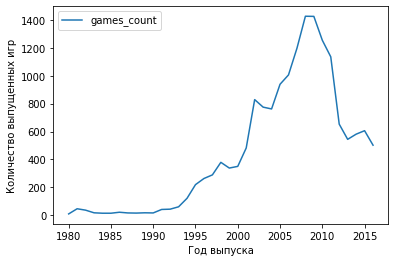

In [18]:
ax = year_count.plot()
ax.set_xlabel('Год выпуска')
ax.set_ylabel('Количество выпущенных игр')

**Вывод:** Не все данные за все периоды являются значимыми. Так, например, до 1995 года было выпущено небольшое количество игр и они не были так популярны и доступны среди пользователей. Пик в 2010 году обусловлен популярностью к компьютерным играм и большей доступностью (внедрение PC)

In [19]:
# Суммарные продажи по платформам
platform_sales = df.groupby(['platform'])['total_sales'].sum().sort_values(ascending = False)
top_platforms = platform_sales.head(7)
dict_platforms  =  top_platforms.reset_index()['platform']

In [20]:
platform_sales

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

In [21]:
platform_sales.reset_index().columns

Index(['platform', 'total_sales'], dtype='object')

Text(0.5, 1.0, 'Продажи по платформам в мире')

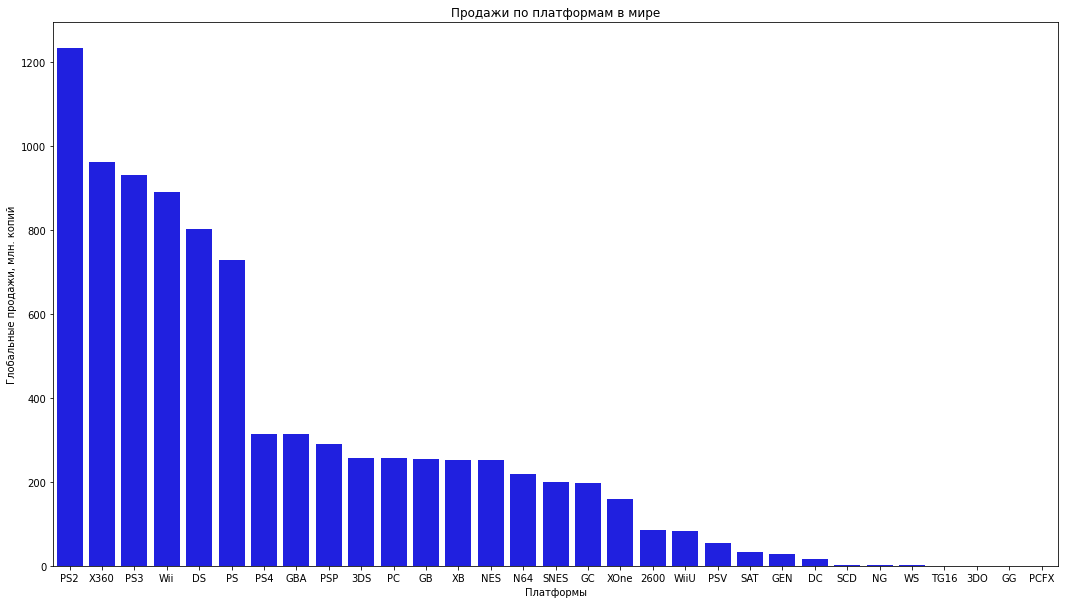

In [22]:
fig, ax = plt.subplots(figsize=(18, 10))
sns.barplot(x='platform', y='total_sales', data=platform_sales.reset_index(), color='b')

ax.set_xlabel('Платформы')
ax.set_ylabel('Глобальные продажи, млн. копий')
ax.set_title('Продажи по платформам в мире')

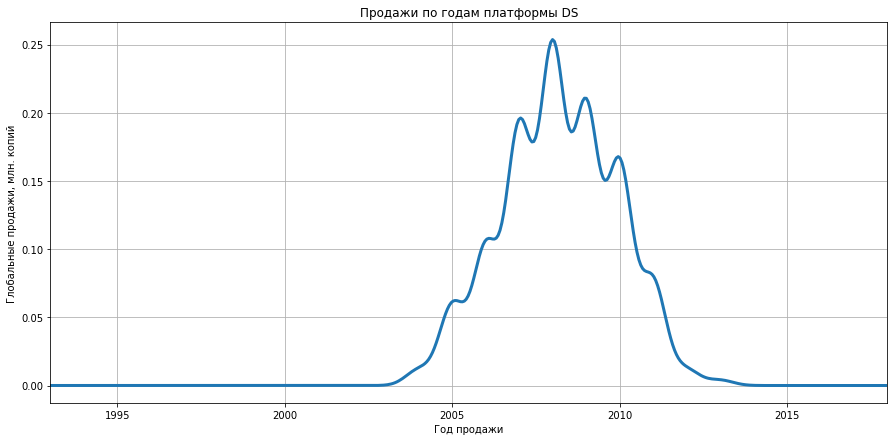

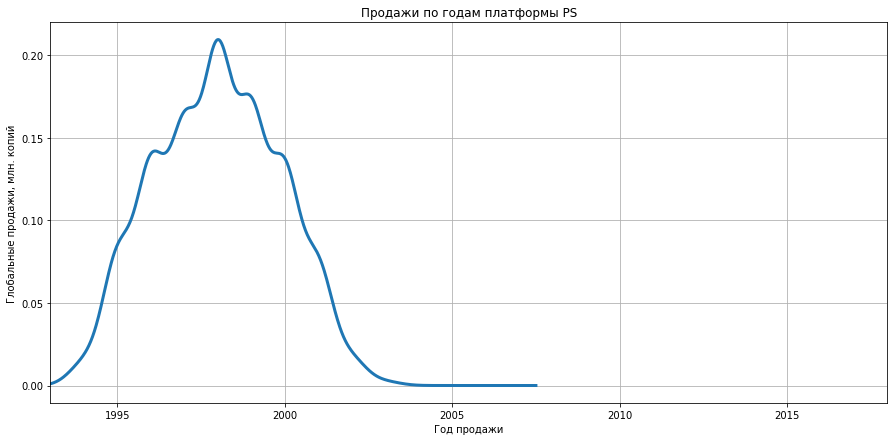

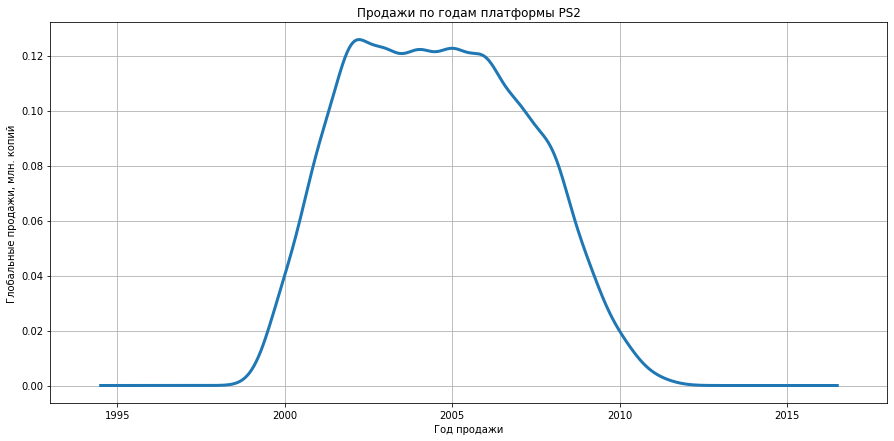

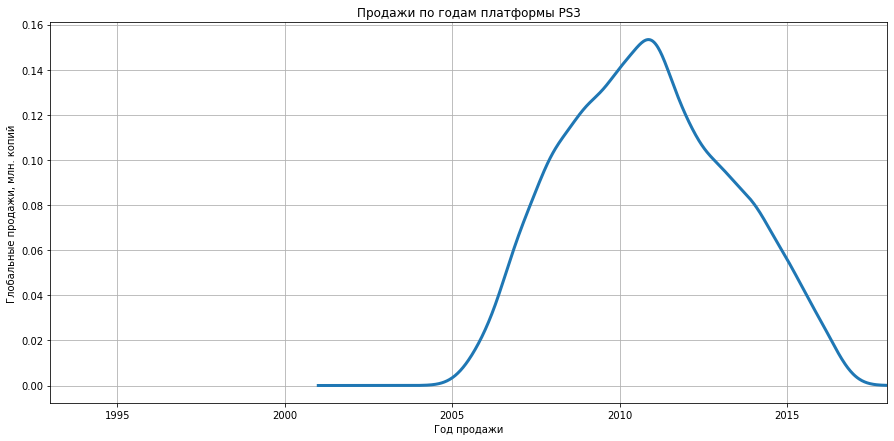

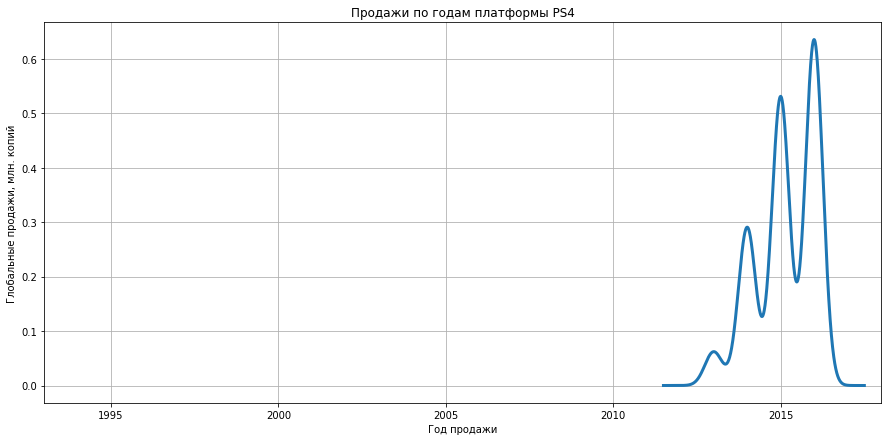

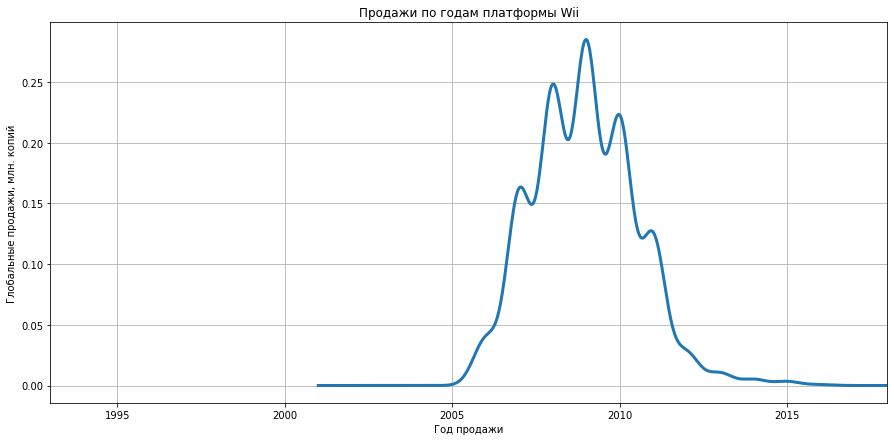

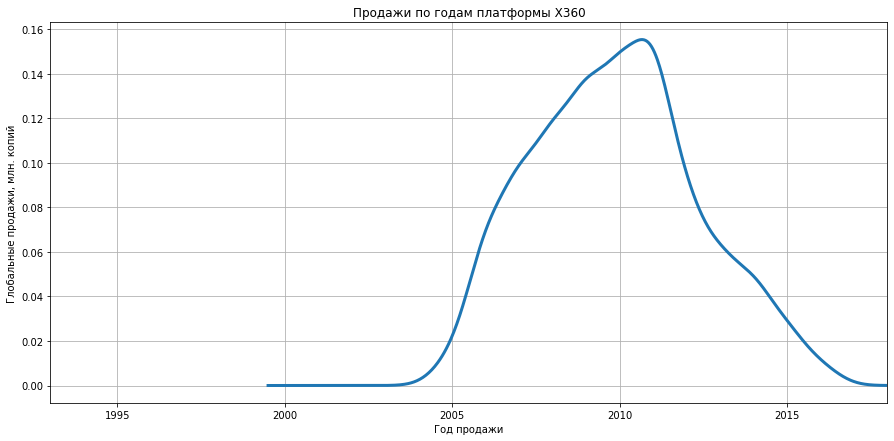

In [23]:
platforms = df.query('platform in @top_platforms.index')[['year_of_release' , 'platform']].groupby('platform')
for platform, platforms_df in platforms:
    fig, ax = plt.subplots(figsize=(10, 12))
    subset = platforms.get_group(platform) 
    subset['year_of_release'].plot(kind='density', grid=True, figsize = (15,7),
                                    linewidth=3, xlim=(1993, 2018))
    ax.set_xlabel('Год продажи')
    ax.set_ylabel('Глобальные продажи, млн. копий')
    ax.set_title('Продажи по годам платформы ' + platform)
    
    plt.show()

**Вывод:**  Из графиков видно, что появляются и исчезают новые платформы примерно 10 лет
<br> В качестве актуального периода возьмём 2010 год

In [24]:
actual_period = df.query('year_of_release > 2010')
actual_period.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60


In [25]:
# Платформы, лидирующие по продажам

top_purchases = actual_period.groupby('platform')['total_sales'].sum().sort_values(ascending = False )
top_purchases

platform
PS3     445.57
X360    380.38
PS4     314.14
3DS     257.81
XOne    159.32
PC       97.68
Wii      95.02
WiiU     82.19
PSV      53.81
DS       38.73
PSP      29.01
PS2       0.45
Name: total_sales, dtype: float64

In [26]:
best_sales_platform = pd.pivot_table(actual_period, index=['platform','year_of_release'],
                                     values='total_sales', aggfunc='sum')
best_sales_platform.head(10)


total_sales
platform year_of_release             
3DS      2011                   63.20
         2012                   51.36
         2013                   56.57
         2014                   43.76
         2015                   27.78
         2016                   15.14
DS       2011                   26.18
         2012                   11.01
         2013                    1.54
PC       2011                   35.03

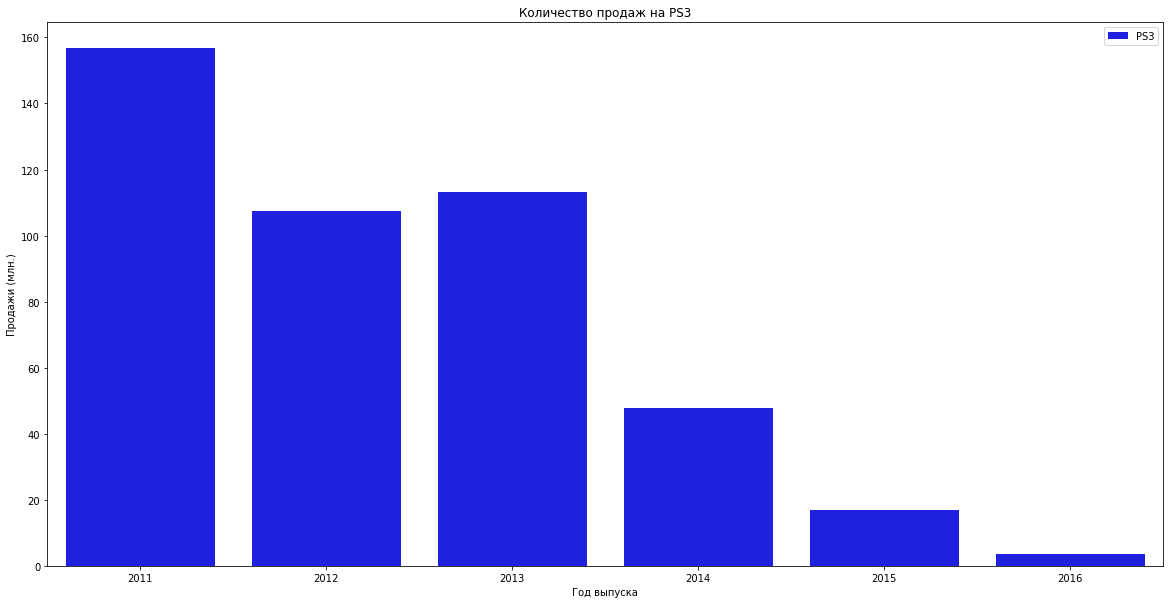

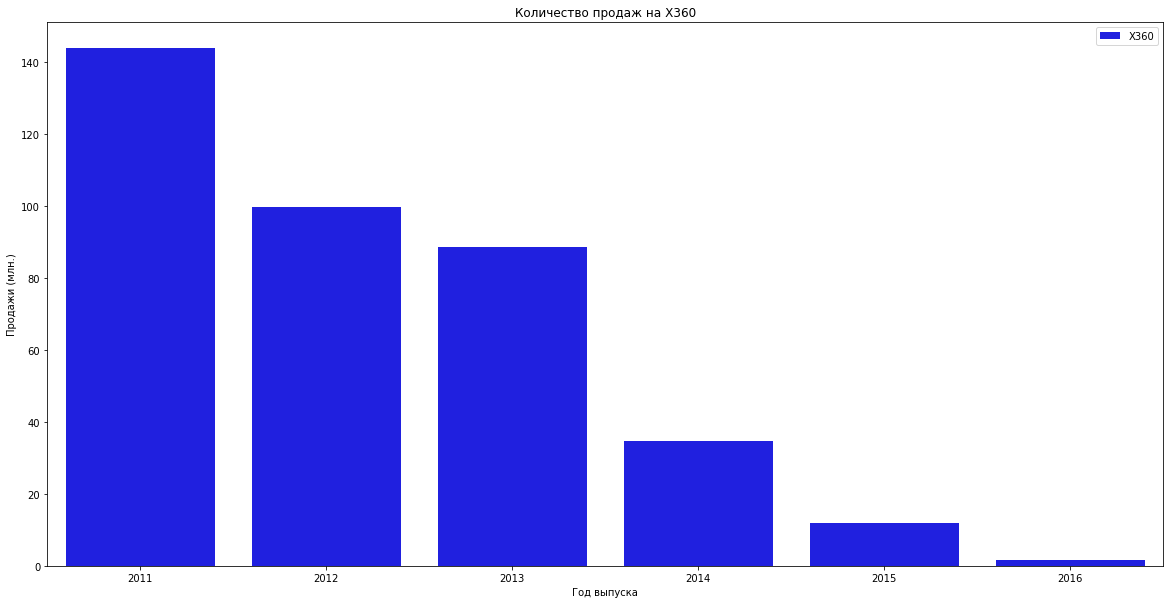

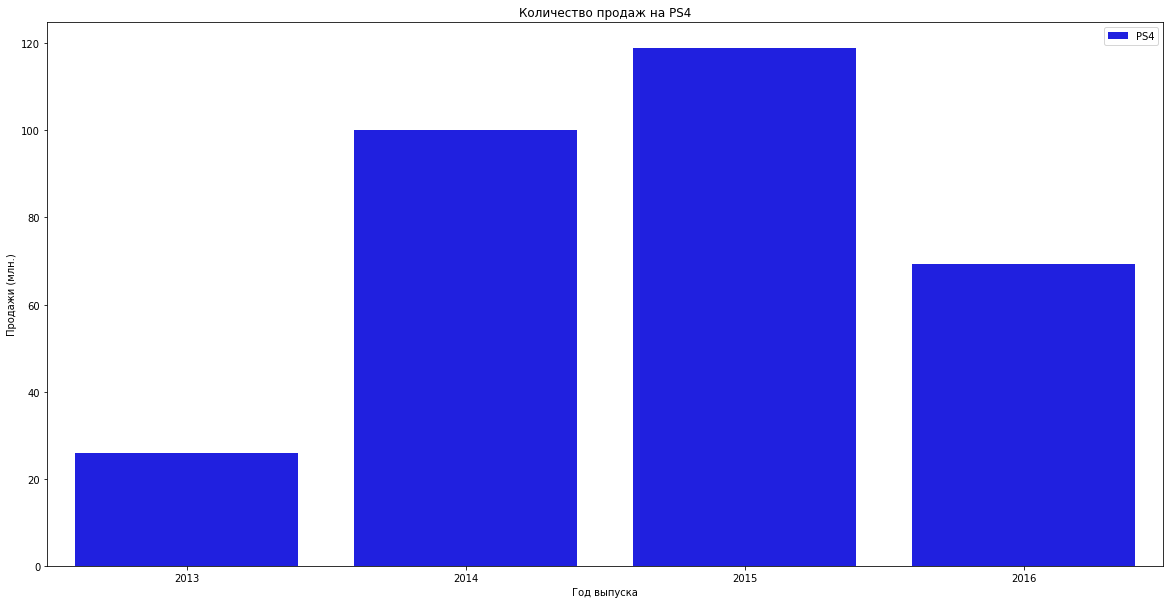

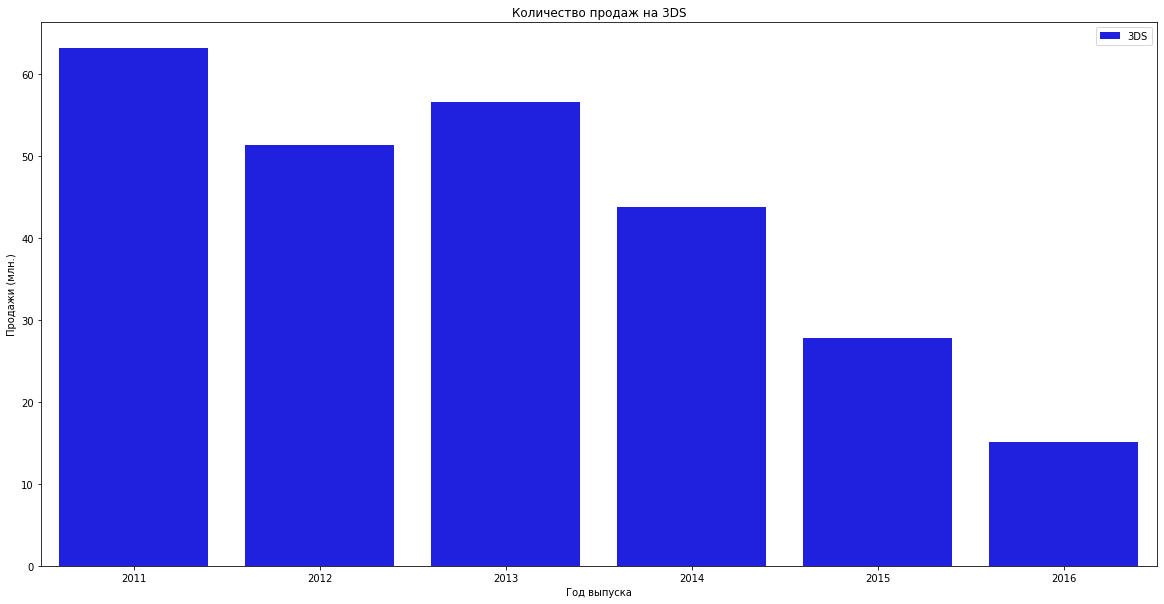

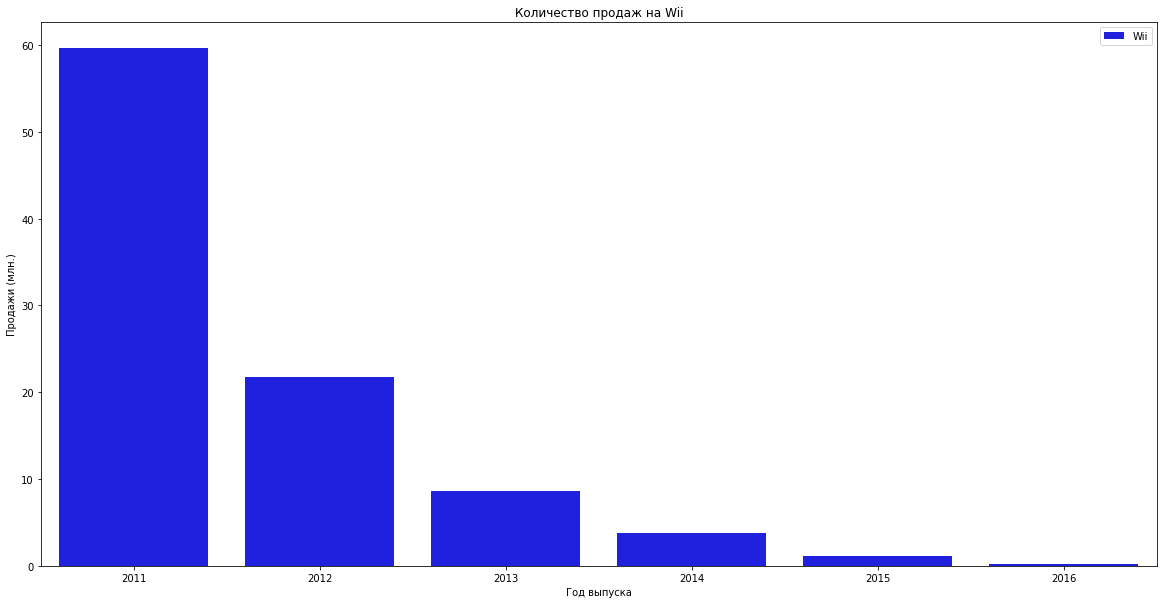

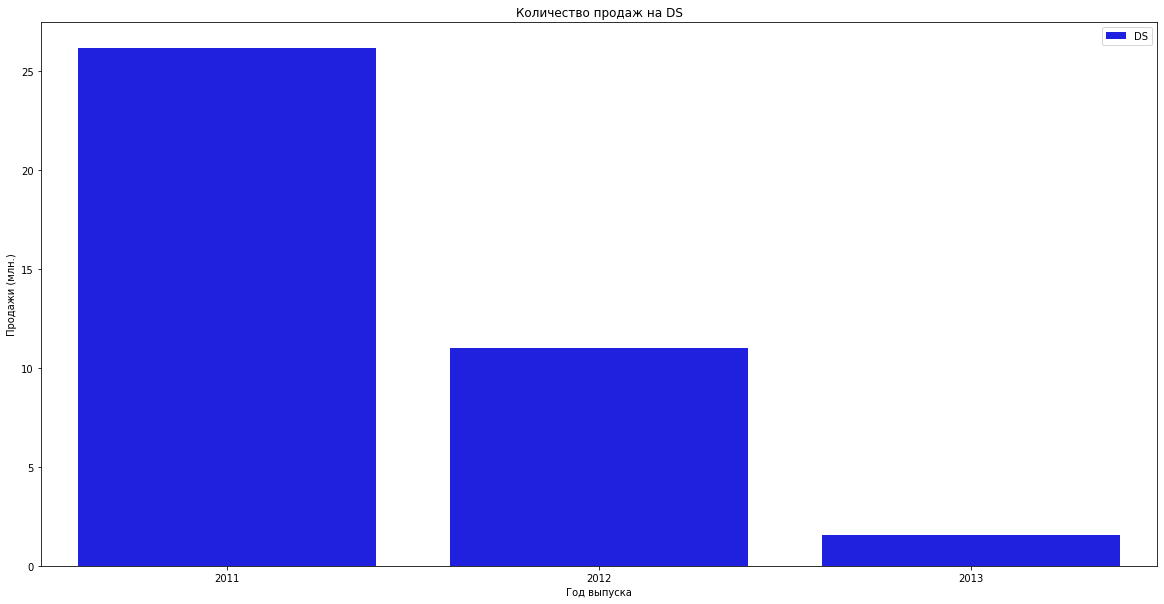

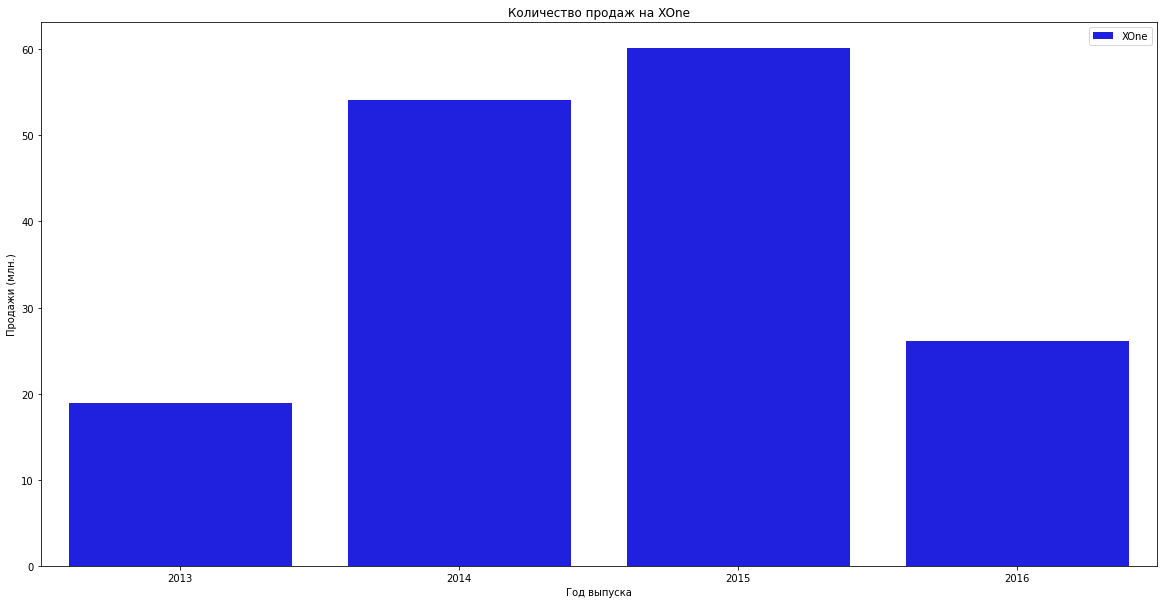

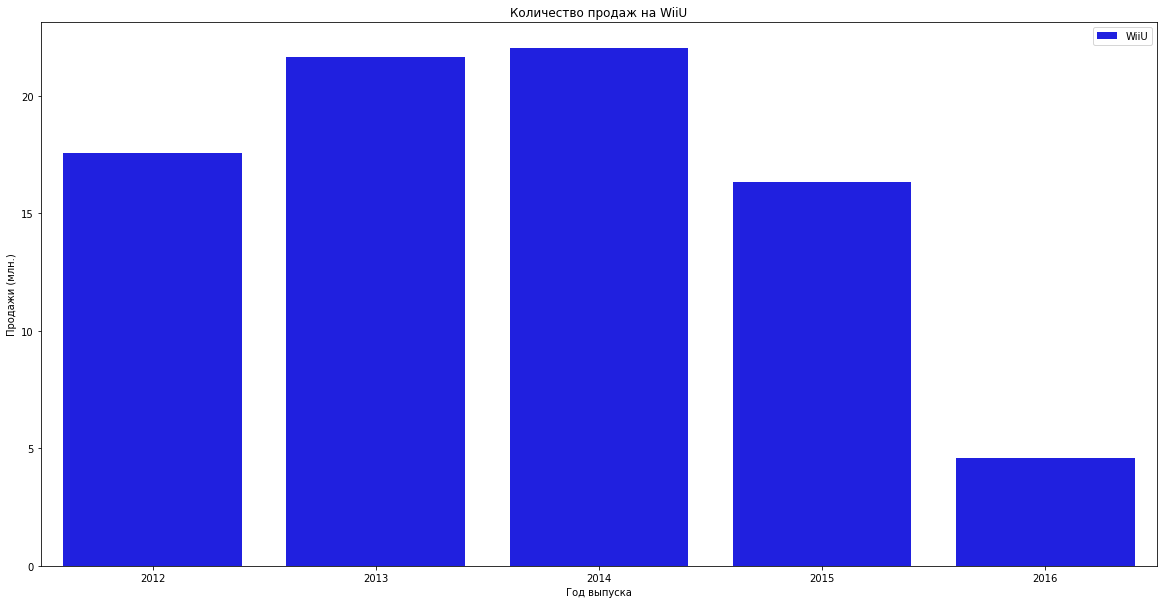

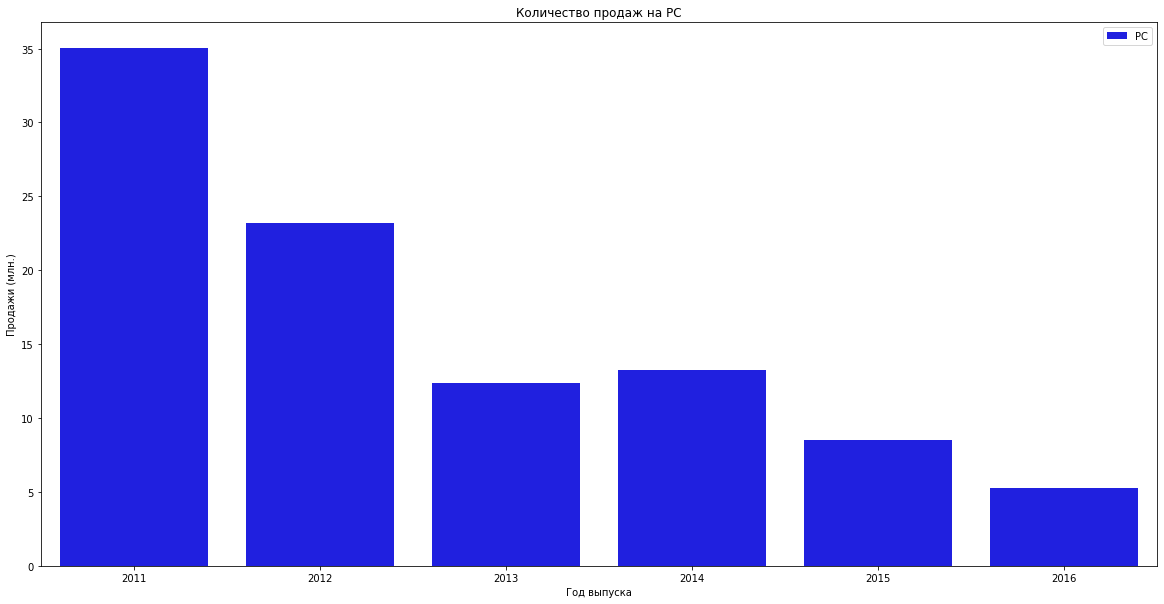

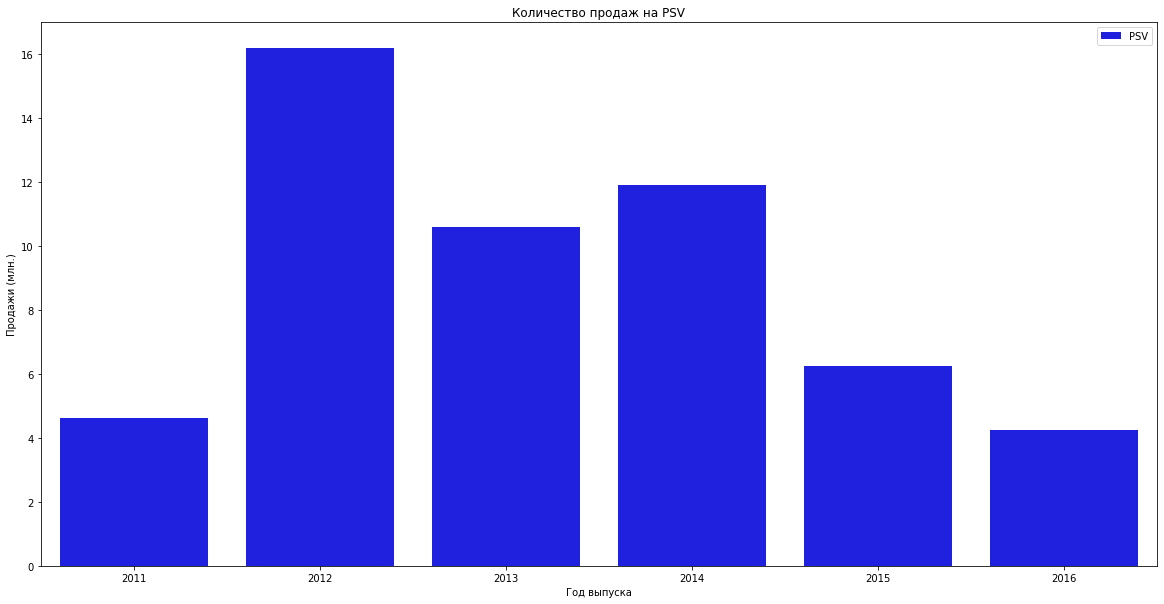

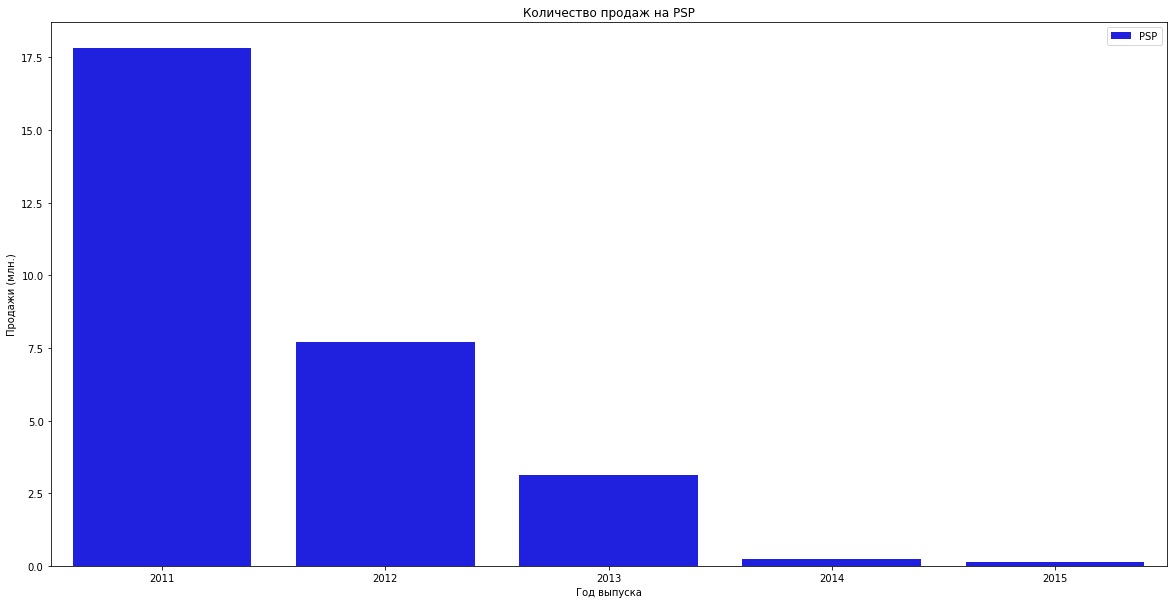

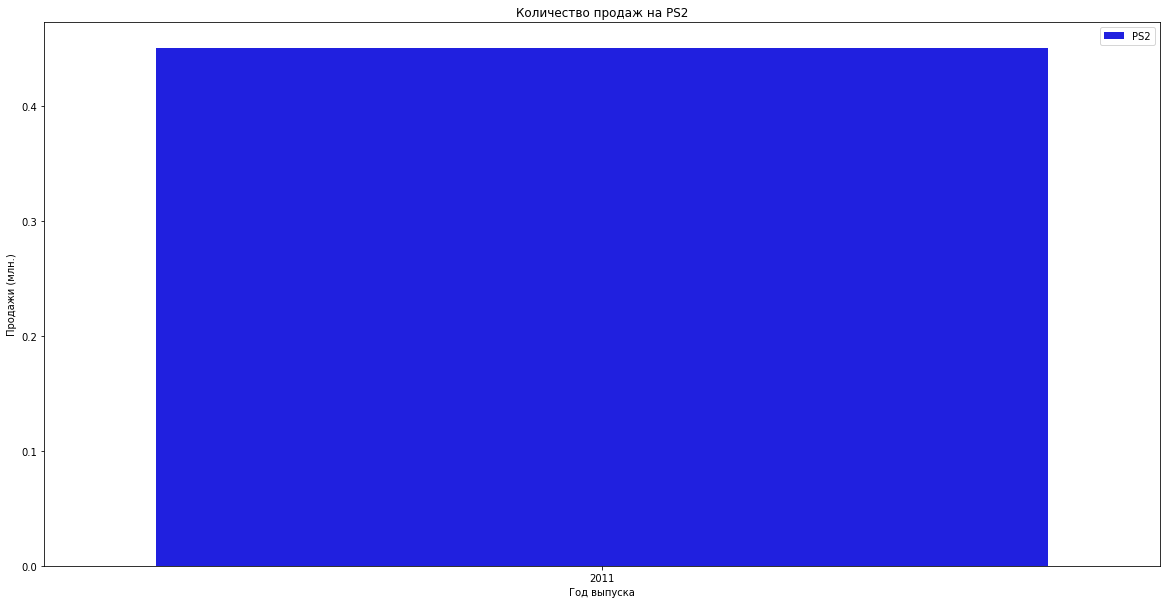

In [27]:
platforms = actual_period['platform'].unique()
best_sales_platform.reset_index(inplace=True)
for i in range(len(platforms)):
    f, ax = plt.subplots(figsize=(20,10))
    platform = platforms[i]
    new_data = best_sales_platform.query('platform == @platform')
    sns.barplot(x='year_of_release', y='total_sales', data=new_data, 
                label=platform, color='b')
    ax.legend(loc='best', frameon=True)   
    ax.set(ylabel='Продажи (млн.)',
           xlabel='Год выпуска',
           title='Количество продаж на '+ platforms[i])
    plt.show()

In [28]:
new_dict = top_purchases.reset_index()['platform'][0:7]
top_platforms = actual_period.query('platform in @new_dict').reset_index()
top_platforms.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
3,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
4,33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60


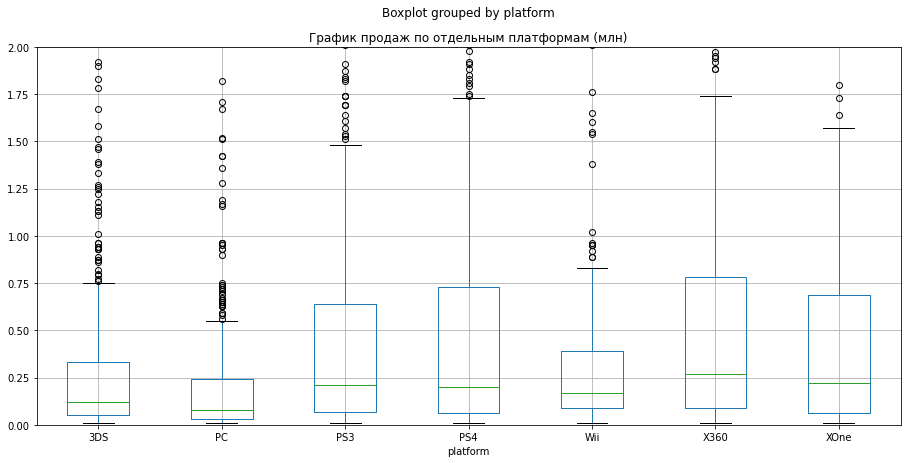

In [29]:
top_platforms.boxplot(column="total_sales", by="platform", figsize = (15,7))
plt.title('График продаж по отдельным платформам (млн)')
_ = plt.ylim(0,2)

**Вывод:**
* Медианы продаж различных платформ, в большинстве своём, находятся на примерно одном уровне, что может говорить о популярности всех платформ
* Пиковые значения продаж достигли ~2млн

In [30]:
pc_data = actual_period.query('platform == "PC"')
pc_data_raiting = pc_data.loc[:, ['total_sales', 'critic_score', 'user_score']]
pc_data_raiting.head()

,total_sales,critic_score,user_score
192,5.14,88.0,4.0
313,3.88,94.0,8.1
458,3.05,70.0,3.9
480,2.97,85.0,5.9
538,2.78,89.0,7.5


In [31]:
pc_data_raiting.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.314185,-0.048967
critic_score,0.314185,1.000000,0.464815
user_score,-0.048967,0.464815,1.000000


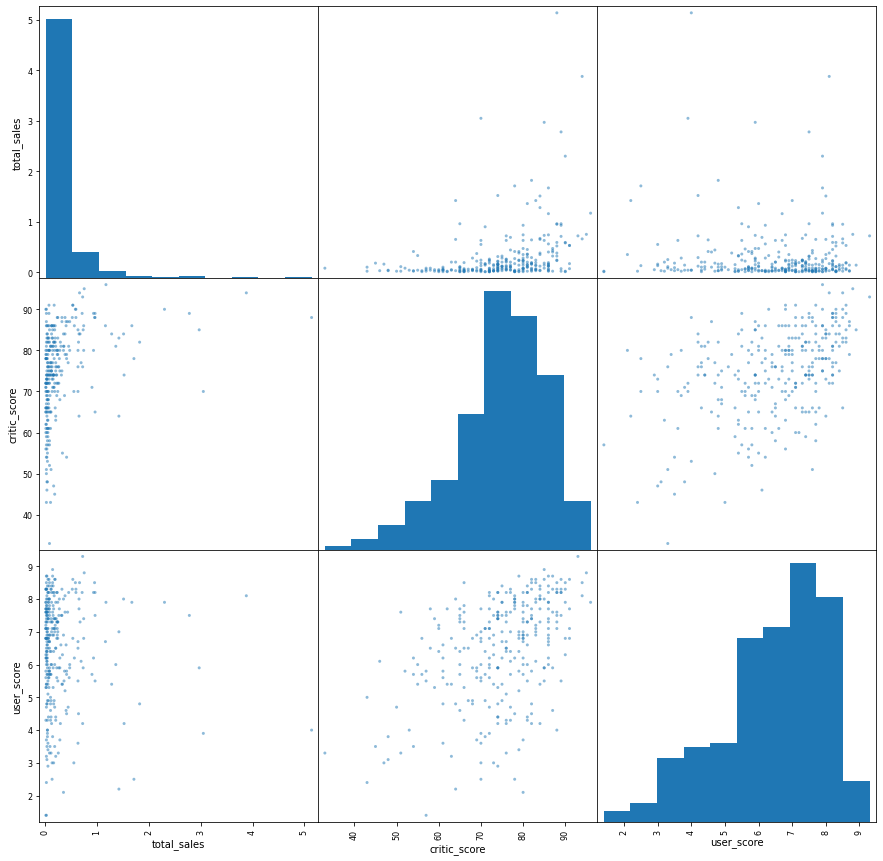

In [32]:
_ = pd.plotting.scatter_matrix(pc_data_raiting, figsize=(15, 15))

**Вывод:**
<br>По полученным данным, на стационарных компьютерах (PC) количество продаж почти не коррелирует с отзывом пользователей и почти на треть (не очень сильно, но весомо) зависит от отзывов критиков

In [33]:
ds_data = actual_period.query('platform == "3DS"')
ds_data_raiting = ds_data.loc[:,['total_sales', 'critic_score', 'user_score']]
ds_data_raiting.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.348740,0.222078
critic_score,0.348740,1.000000,0.745222
user_score,0.222078,0.745222,1.000000


In [34]:
ps3_data = actual_period.query('platform == "PS3"')
ps3_data_raiting = ps3_data.loc[:,['total_sales', 'critic_score', 'user_score']]
ps3_data_raiting.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.380111,0.014089
critic_score,0.380111,1.000000,0.563315
user_score,0.014089,0.563315,1.000000


In [35]:
wii_data = actual_period.query('platform == "Wii"')
wii_data_raiting = wii_data.loc[:,['total_sales', 'critic_score', 'user_score']]
wii_data_raiting.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.292269,0.145504
critic_score,0.292269,1.000000,0.444480
user_score,0.145504,0.444480,1.000000


**Вывод:** Из выбранных платформ, продажи на всех зависят от оценки критиков почти на треть, а оценка пользователей играла лишь небольшую роль (чуть большую на платформах 3DS и Wii)

In [36]:
pd.pivot_table(actual_period, index='genre', values='total_sales', aggfunc='sum') \
              .sort_values('total_sales', ascending=False)

,total_sales
genre,
Action,557.80
Shooter,402.91
Role-Playing,245.63
Sports,237.15
Misc,139.42
Platform,88.68
Racing,88.31
Fighting,66.90
Simulation,50.26


**Вывод:**
<br>Из таблицы видно, что самыми популярными жанрами игр стали `Action`, `Shooter`, `Role-Playing (RP)`, `Sports`; Наименее привлекательными для пользователей оказались игры на логику: `Puzzle` и `Strategy`
<br>Вероятнее всего, пользователей интересуют более динамичные, соревновательные и многопользовательские игры

In [37]:
temp_table = pd.pivot_table(actual_period, index='genre', values='total_sales', aggfunc='mean') \
              .sort_values('total_sales', ascending=False)
temp_table.columns = ['mean_sales']
temp_table.reset_index(inplace=True)
temp_table

,genre,mean_sales
0,Shooter,1.224650
1,Platform,0.726885
2,Sports,0.609640
3,Role-Playing,0.528237
4,Racing,0.490611
5,Action,0.439559
6,Fighting,0.420755
7,Misc,0.371787
8,Simulation,0.369559
9,Strategy,0.189402


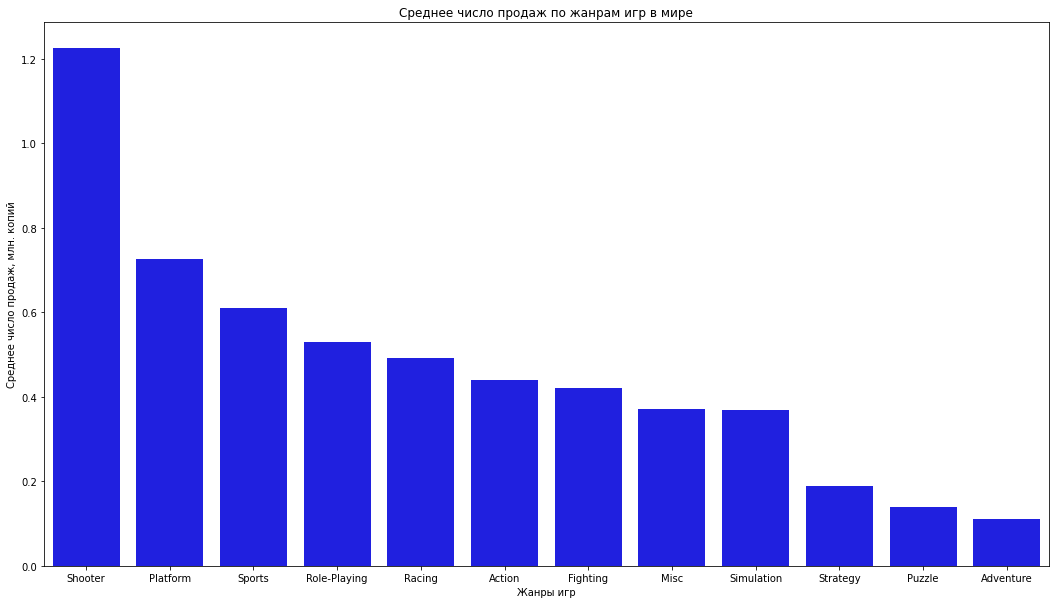

In [38]:
fig, ax = plt.subplots(figsize=(18, 10))
sns.barplot(x='genre', y='mean_sales', data=temp_table, color='b')

ax.set_xlabel('Жанры игр')
ax.set_ylabel('Среднее число продаж, млн. копий')
ax.set_title('Среднее число продаж по жанрам игр в мире')

plt.show()

**Вывод:**
<br>Из графика средних продаж видно, что самыми популярными жанрами игр стали `Shooter`, `Platform`, `Sports`, `Role-Playing (RP)`; Наименее привлекательными для пользователей оказались игры на логику, такие как `Strategy`, `Puzzle`, а также игры про приключения (жанр `Adventure`). Возможно, такой жанр не пришёлся по вкусу пользователям из-за того что такие игры, зачастую, нацелены на прохождение в одиночестве; либо же среди игр данного жанра нет сильно полюбившихся пользователям.

**Вывод по исследовательскому анализу данных:**
<br>Мы ответили на все поставленные нами вопросы, выявили крайне малую зависимость числа продаж на различных платформах от оценки критиков и пользователей
<br>Более наглядно (графически) мы показали, как изменялось число продаж различных платформ спустя года (начиная с установленного актуального периода: от 2010 года)
<br>Также по итогам исследования мы выяснили, что примерный срок жизни платформы составляет 10 лет, а на период 2016 года была актуальна лишь консоль `DS`

# Шаг 4. Составление портрета пользователей каждого региона

In [39]:
regions = df.pivot_table(index='platform', values=['na_sales','eu_sales','jp_sales', 'total_sales'], aggfunc='sum')

regions['na'] = regions['na_sales'] / regions['total_sales']
regions['eu'] = regions['eu_sales'] / regions['total_sales']
regions['jp'] = regions['jp_sales'] / regions['total_sales']

regions.head()

,eu_sales,jp_sales,na_sales,total_sales,na,eu,jp
platform,,,,,,,
2600,4.86,0.00,80.78,86.48,0.934089,0.056198,0.000000
3DO,0.00,0.10,0.00,0.10,0.000000,0.000000,1.000000
3DS,61.27,100.62,82.65,257.81,0.320585,0.237656,0.390287
DC,1.69,8.56,5.43,15.95,0.340439,0.105956,0.536677
DS,188.41,175.02,380.31,802.78,0.473741,0.234697,0.218017


In [40]:
rating_eu = regions[['eu_sales', 'eu']].sort_values(ascending=False, by='eu_sales').head()
rating_jp = regions[['jp_sales', 'jp']].sort_values(ascending=False, by='jp_sales').head()
rating_na = regions[['na_sales', 'na']].sort_values(ascending=False, by='na_sales').head()

print(rating_eu)
print()
print(rating_na)
print()
print(rating_jp)

          eu_sales        eu
platform                    
PS2         332.63  0.269650
PS3         327.21  0.351332
X360        268.32  0.279139
Wii         258.32  0.289863
PS          212.39  0.291913

          na_sales        na
platform                    
X360        595.74  0.619762
PS2         572.92  0.464444
Wii         486.87  0.546321
PS3         390.13  0.418891
DS          380.31  0.473741

          jp_sales        jp
platform                    
DS          175.02  0.218017
PS          139.78  0.192116
PS2         137.54  0.111498
SNES        116.55  0.582633
3DS         100.62  0.390287


**Вывод:**
* В северной Америке наблюдается наибольшее число продаж в целом (возможно, это обусловлено численностью населения, а, возможно, и заинтересованностью в играх), лидирующей же платформой там выступает `Xbox-360`
* Япония выступает Антогонистом Америки по числу продаж, лидирующей платформой там выдалась `DS`
* В европе мы можем наблюдать среднее число продаж и `PS2` в качестве лидера
* Интересный факт, что консоль `PS2` во всех регионах была крайне популярна (всегда входила в топ-3) 

In [41]:
na_genres_df = actual_period.pivot_table(index='genre', values='na_sales', aggfunc=('sum'))\
                            .sort_values(by='na_sales', ascending=False)
eu_genres_df = actual_period.pivot_table(index='genre', values='eu_sales', aggfunc=('sum'))\
                            .sort_values(by='eu_sales', ascending=False)
jp_genres_df = actual_period.pivot_table(index='genre', values='jp_sales', aggfunc=('sum'))\
                         .sort_values(by='jp_sales', ascending=False)

print(eu_genres_df)
print()
print(na_genres_df)
print()
print(jp_genres_df)

              eu_sales
genre                 
Action          199.12
Shooter         148.02
Sports           88.48
Role-Playing     62.30
Racing           40.58
Misc             39.72
Platform         30.07
Simulation       19.72
Fighting         16.24
Adventure        13.96
Strategy          8.02
Puzzle            3.56

              na_sales
genre                 
Action          230.92
Shooter         194.43
Sports          108.70
Role-Playing     83.78
Misc             69.69
Platform         38.28
Racing           31.98
Fighting         31.63
Simulation       15.37
Adventure        14.76
Strategy          7.48
Puzzle            2.74

              jp_sales
genre                 
Role-Playing     79.87
Action           63.62
Misc             17.60
Fighting         12.38
Platform         12.13
Adventure        12.07
Shooter          11.92
Simulation       11.64
Sports           11.09
Racing            5.64
Strategy          4.78
Puzzle            2.91


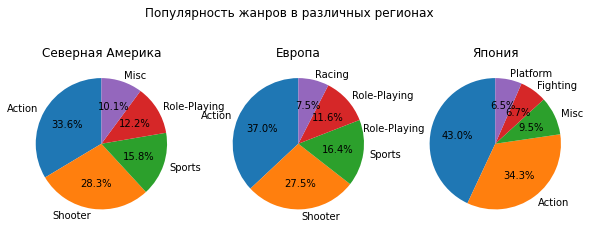

In [42]:
na_genres_head = na_genres_df.head(5)
eu_genres_head = eu_genres_df.head(5)
jp_genres_head = jp_genres_df.head(5)

# Создаем фигуру и три объекта subplot
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

# Строим первый график Pie на первом subplot
ax[0].pie(na_genres_head['na_sales'], labels=na_genres_head.index, autopct='%1.1f%%', startangle=90)
ax[0].set_title('Северная Америка')

# Строим второй график Pie на втором subplot
ax[1].pie(eu_genres_head['eu_sales'], labels=eu_genres_head.index, autopct='%1.1f%%', startangle=90)
ax[1].set_title('Европа')

# Строим третий график Pie на третьем subplot
ax[2].pie(jp_genres_head['jp_sales'], labels=jp_genres_head.index, autopct='%1.1f%%', startangle=90)
ax[2].set_title('Япония')

# Добавляем заголовок графиков Pie
fig.suptitle('Популярность жанров в различных регионах')

# Показываем график
plt.show()

**Вывод:**
* Жанр `Action` занимает лидирующие позиции во всех регионах
* Жанр `Shooter` также популярен в северной Америке и Европе
* В Японии мы наблюдаем несколько другую иерархию: там также довольно популярен жанр `Action`, но лидирующую позицию занимают игры жанра `RP (Role-Playing)`, да и топ-5 не особо похож на подборку других регионов

In [43]:
def raiting_num(row):
    if row['rating'] == "E":
        return 0
    if row['rating'] == "E10+":
        return 1
    if row['rating'] == "EC":
        return 2
    if row['rating'] == "M":
        return 3
    if row['rating'] == "RP":
        return 4
    if row['rating'] == "T":
        return 5
    return -1

In [44]:
actual_period['rating_num'] = actual_period.apply(raiting_num, axis=1)

# Так и не понял, в чём ошибка
# При
# actual_period.loc[:, 'rating_num'] = actual_period.apply(raiting_num, axis=1)
# Выдаёт тоже самое

/tmp/ipykernel_163/405884510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_period['rating_num'] = actual_period.apply(raiting_num, axis=1)


In [45]:
raiting_df = actual_period.groupby('rating_num' )[['eu_sales', 'jp_sales', 'na_sales', 'total_sales']].sum()
raiting_df.reset_index(inplace=True)
raiting_df

,rating_num,eu_sales,jp_sales,na_sales,total_sales
0,-1,116.61,138.21,123.69,412.48
1,0,141.73,36.68,170.17,389.44
2,1,78.00,11.23,117.72,230.86
3,2,0.00,0.00,0.42,0.45
4,3,250.26,26.14,308.45,666.81
5,4,0.03,0.00,0.00,0.04
6,5,83.16,33.39,109.31,254.03


In [46]:
raiting_df.corr()

,rating_num,eu_sales,jp_sales,na_sales,total_sales
rating_num,1.000000,-0.187938,-0.600973,-0.140887,-0.265665
eu_sales,-0.187938,1.000000,0.320990,0.993220,0.988263
jp_sales,-0.600973,0.320990,1.000000,0.239228,0.457470
na_sales,-0.140887,0.993220,0.239228,1.000000,0.972055
total_sales,-0.265665,0.988263,0.457470,0.972055,1.000000


**Вывод:**
<br>Нет сильной корреляции между рейтингом игры и продажей в различных регионах и в общем, кроме Японии

**Общий вывод по шагу 4:**
* `PS2` популярен во всех трёх регионах
* Жители северной Америки предпочитают `Xbox-360`, а жители Японии - `DS`
* В Японии популярны несколько другие жанры игр, нежели в Северной Америке и Европе
* Также мы выяснили, что зависимости между числом продаж и рейтингом игры почтти нет (за исключением японии, где кореляция составила примерно -0.6)

# Шаг 5. Проверка гипотез

**Гипотеза 1:**
<br>H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
<br>H1: Средние пользовательские рейтинги платформы Xbox One больше, чем у PC

In [47]:
xbox_one_users = actual_period.query('platform == "XOne"').dropna(subset=['user_score']).reset_index()
pc_users = actual_period.query('platform == "PC"').dropna(subset=['user_score']).reset_index()

In [48]:
alpha = 0.05

stat, p = st.ttest_ind(xbox_one_users['user_score'], pc_users['user_score'], alternative='greater')

print('Xbox360 user score mean:', xbox_one_users['user_score'].mean())
print('PC user score mean:', pc_users['user_score'].mean())
print('p-value: ', p)
if p < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не удалось отвергнуть нулевую гипотезу")

Xbox360 user score mean: 6.521428571428572
PC user score mean: 6.451791530944625
p-value:  0.3133801135711199
Не удалось отвергнуть нулевую гипотезу


**Вывод:** мы пришли к выводу, что средние пользовательские рейтинги платформ Xbox One и PC - одинаковые

**Гипотеза 2:**
<br>H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые
<br>H1: Cредние пользовательские рейтинги жанра Action больше, чем у Sports

In [49]:
action_df = actual_period.query('genre == "Action"').dropna(subset=['user_score']).reset_index()
sports_df = actual_period.query('genre == "Sports"').dropna(subset = ['user_score']).reset_index()

In [50]:
stat, p = st.ttest_ind(action_df['user_score'], sports_df['user_score'], alternative='greater')

print('Action genre user score mean:', action_df['user_score'].mean())
print('Sports genre user score mean:', sports_df['user_score'].mean())
print('p-value: ', p)
if (p < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Action genre user score mean: 6.775903614457831
Sports genre user score mean: 5.650813008130081
p-value:  2.5987275126076027e-24
Отвергаем нулевую гипотезу


**Вывод:** Cредние пользовательские рейтинги жанра Action больше, чем у Sports

**Общий вывод по шагу 5:**
<br>В этом разделе мы проверили 2 гипотезы и получили следующие ответы:
* Проверяя, являются ли средние пользовательские рейтинги платформ Xbox One и PC равными, мы пришли к выводу, что так оно и есть
* Проверяя, являются ли средние пользовательские рейтинги жанров Action и Sports равными, мы пришли к выводу, что это не так и средние пользовательские рейтинги жанра Action больше, чем у Sports

Также, в этом разделе я дважды использовал `ttest_ind` с параметром `alternative='greater'` т.к. выборки независимы и нужно было проверить, является тот или иной рейтинг больше другого

# Общий вывод

В ходе данного проекта было выполнено исследование и анализ данных о продажах компьютерных игр, пользовательских рейтингах и других характеристиках игр за период от 2010 года. На следующие замечания стоит обратить особое внимание:
* Средний жизненный цикл платформ - 10 лет
* В работе не были важны данные за все период т.к. платформы и популярность гейминга в целом развивались последовательно, основной пик индустрии пришёлся на 2010 год
* Самыми прибыльными с сильным отрывом стали игры жанра `Shooter` и `Action`
* Игры на логику (такие как стратегии и пазлы) куда менее популярны, чем игры жанра экшн и многопользовательские игры
* Популярные жанры Японии различаются с популярными жанрами в Северной Америке и Европе
* Оценка критиков влияет на продаваемость игр в Японии
* Рейтинг игры влияет на продаваемость игр в Японии и слабо влияет на продаваемость игр в целом
* По результатам проверенных гипотез, мы выяснили, что:
    * Средние пользовательские рейтинги платформ Xbox One и PC - одинаковые
    * Cредние пользовательские рейтинги жанра Action больше, чем у Sports